## Exploratory Data Analysis

In [43]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [25]:
# import data
df = pd.read_csv("data/cleaned-BA-reviews.csv", index_col=0)

In [26]:
df

,reviews,stars,date,country,verified,corpus
0,"✅ Trip Verified | The seats were excellent, ...",5.0,2025-02-28,United Kingdom,True,seat excellent feel much room official seat pi...
1,✅ Trip Verified | After the nightmare of get...,9.0,2025-02-27,United Kingdom,True,nightmare getting triple security nairobi airp...
2,✅ Trip Verified | Prior to boarding a gate a...,5.0,2025-02-21,United Kingdom,True,prior boarding gate agent seemed pick elderly ...
3,✅ Trip Verified | I flew from Amsterdam to L...,3.0,2025-02-18,Netherlands,True,flew amsterdam la vega layover heathrow novemb...
4,"✅ Trip Verified | First the good news, the clu...",1.0,2025-02-14,United Kingdom,True,first good news club suite huge improvement ol...
...,...,...,...,...,...,...
3495,On past experience I chose BA for our long hau...,9.0,2014-11-25,United Kingdom,False,past experience chose ba long haul return flig...
3496,BA16 Singapore to London. B777 World Traveller...,10.0,2014-11-20,Singapore,False,ba singapore london b world traveller cabin on...
3497,LHR-LCA in Club Europe. The First class lounge...,10.0,2014-11-20,United Kingdom,False,lhr lca club europe first class lounge fairly ...
3498,LHR – LAX Club World A380 return a week later ...,7.0,2014-11-20,United Kingdom,False,lhr lax club world return week later lax lhr f...


#### Average overall rating

In [27]:
# average rating
print(f"The average rating out of 10 is: {df.stars.mean()}")

The average rating out of 10 is: 4.525443110348771


#### Total counts for each ratings


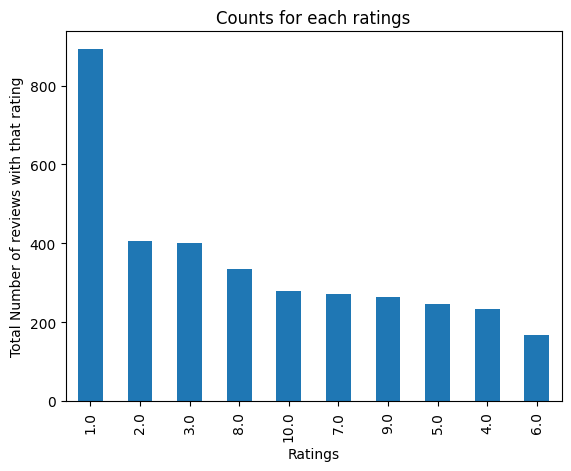

In [28]:
# count each rating
each_rating_total = df.stars.value_counts()

# plot the each rating total
each_rating_total.plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")
plt.savefig("image/each_rating_total.png", dpi=300)
plt.show()

#### Number of feedbacks with each rating

In [29]:
df_ratings = pd.DataFrame(each_rating_total)
df_ratings

,count
stars,
1.0,893
2.0,407
3.0,402
8.0,334
10.0,280
7.0,271
9.0,265
5.0,245
4.0,234


In [30]:
df_ratings.keys()

Index(['count'], dtype='object')

In [31]:
df_ratings.reset_index(inplace=True)

In [32]:
df_ratings

,stars,count
0,1.0,893
1,2.0,407
2,3.0,402
3,8.0,334
4,10.0,280
5,7.0,271
6,9.0,265
7,5.0,245
8,4.0,234
9,6.0,167


In [35]:
df_ratings.keys()

Index(['stars', 'count'], dtype='object')

In [36]:
# renaming the columns
df_ratings.rename(columns={'stars':'Stars', 'count':'total_counts'}, inplace=True)

In [37]:
df_ratings

,Stars,total_counts
0,1.0,893
1,2.0,407
2,3.0,402
3,8.0,334
4,10.0,280
5,7.0,271
6,9.0,265
7,5.0,245
8,4.0,234
9,6.0,167


In [38]:
# calculating pct values, and set as a column
pct_values = (df_ratings.total_counts.values/ df_ratings.total_counts.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [18]:
#resetting index as we do not want to confuse between the index and the rating values
#df_ratings = df_ratings.reset_index()

In [39]:
# renaming columns
#df_ratings.rename(columns={'stars':'Stars', 'count':'total_counts'}, inplace=True)

In [40]:
df_ratings

,Stars,total_counts,pct_values
0,1.0,893,25.53
1,2.0,407,11.64
2,3.0,402,11.49
3,8.0,334,9.55
4,10.0,280,8.00
5,7.0,271,7.75
6,9.0,265,7.58
7,5.0,245,7.00
8,4.0,234,6.69
9,6.0,167,4.77


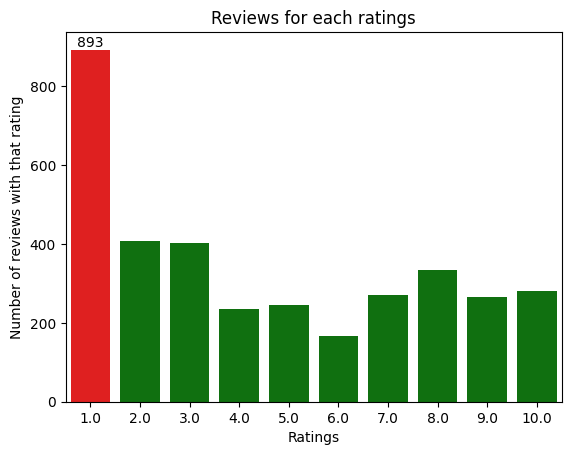

In [101]:
# plot each rating with total number of reviews
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'g' for x in df_ratings.total_counts ]

ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,palette=clrs)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Ratings")
ax.set_ylabel("Number of reviews with that rating")
ax.set_title("Reviews for each ratings")
plt.savefig("image/each_rating_total_with_total_reviews.png", dpi=300)
plt.show()

In [50]:
# number of unique countries to give the reviews
print(f"Unique countries: {len(df.country.unique())}")

Unique countries: 71


#### Country with the most review  

In [66]:
# reviewer country
reviewer_country = df.country.value_counts()

reviewer_country

,count
country,
United Kingdom,2163
United States,419
Australia,136
Canada,111
Germany,66
...,...
Morocco,1
Panama,1
Ecuador,1


In [67]:
# setting first five country as a reviewer dataframe
df_country_review = pd.DataFrame(reviewer_country.head())

In [68]:
df_country_review.keys()

Index(['count'], dtype='object')

In [69]:
df_country_review

,count
country,
United Kingdom,2163
United States,419
Australia,136
Canada,111
Germany,66


In [70]:
# resetting index
df_country_review.reset_index(inplace=True)

In [71]:
df_country_review.keys()

Index(['country', 'count'], dtype='object')

In [72]:
df_country_review

,country,count
0,United Kingdom,2163
1,United States,419
2,Australia,136
3,Canada,111
4,Germany,66


In [73]:
# renaming the column
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)

In [74]:
df_country_review

,country,total_reviews
0,United Kingdom,2163
1,United States,419
2,Australia,136
3,Canada,111
4,Germany,66


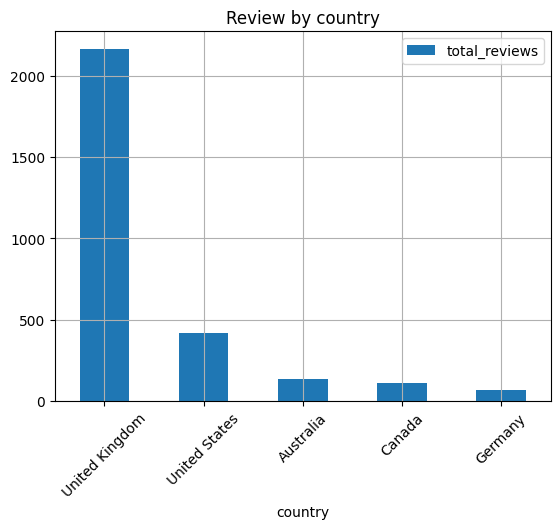

In [77]:
# review by country
df_country_review.plot(kind="bar", x='country')
plt.title("Review by country")
plt.xticks(rotation=45)
plt.savefig("image/review_by_country.png", dpi=300)
plt.grid()
plt.show()

#### Country with average highest ratings

In [85]:
average_rating = df.groupby('country')['stars'].mean()
average_rating

,stars
country,
Argentina,3.333333
Australia,5.007353
Austria,4.800000
Bahrain,3.000000
Belgium,4.818182
...,...
Ukraine,5.500000
United Arab Emirates,4.909091
United Kingdom,4.596207


In [86]:
# sort values
average_rating = average_rating.sort_values(ascending=False)

In [87]:
average_rating

,stars
country,
Morocco,10.000000
Ecuador,9.000000
Costa Rica,9.000000
Chile,9.000000
Panama,8.000000
...,...
Iceland,1.666667
Bermuda,1.500000
Senegal,1.000000


In [88]:
df_country_rating = pd.DataFrame(average_rating)

In [89]:
df_country_rating

,stars
country,
Morocco,10.000000
Ecuador,9.000000
Costa Rica,9.000000
Chile,9.000000
Panama,8.000000
...,...
Iceland,1.666667
Bermuda,1.500000
Senegal,1.000000


In [90]:
df_country_rating.keys()

Index(['stars'], dtype='object')

In [91]:
df_country_rating.reset_index(inplace=True)

In [92]:
df_country_rating.keys()

Index(['country', 'stars'], dtype='object')

In [93]:
df_country_rating

,country,stars
0,Morocco,10.000000
1,Ecuador,9.000000
2,Costa Rica,9.000000
3,Chile,9.000000
4,Panama,8.000000
...,...,...
66,Iceland,1.666667
67,Bermuda,1.500000
68,Senegal,1.000000
69,Jordan,1.000000


In [94]:
# renaming column name
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

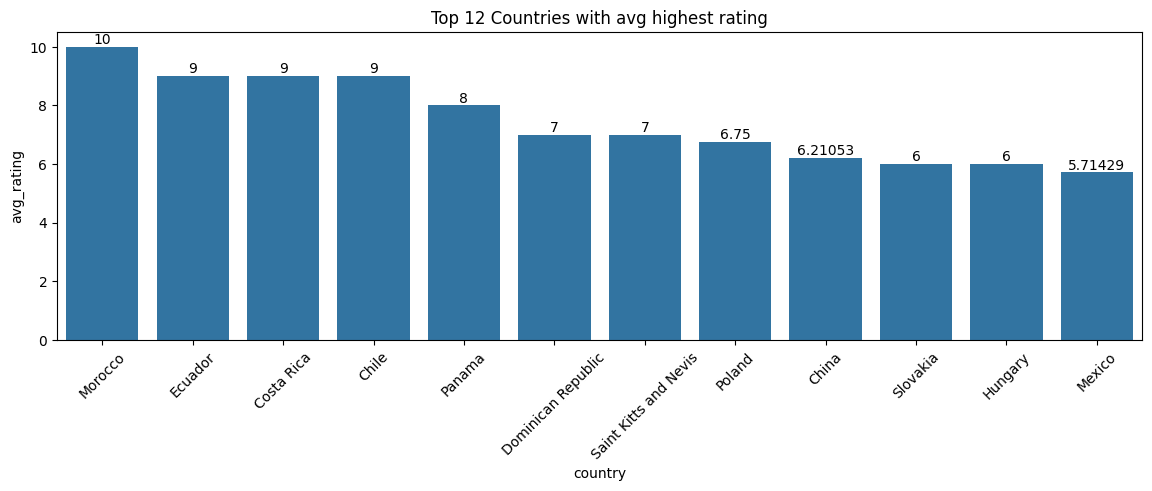

In [100]:
# plot the image: average rating by country
fig, ax = plt.subplots(figsize=(14,4))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#plt.grid()
plt.savefig("image/avg_rating_by_country.png", dpi=300)
plt.show()

#### Time Series Analysis

In [102]:
# date to datetime
df.date = pd.to_datetime(df.date)

In [103]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

**Findings:** It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to **Covid Pandemic travel restrictions**. **No particular trend** is visible from the plot.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


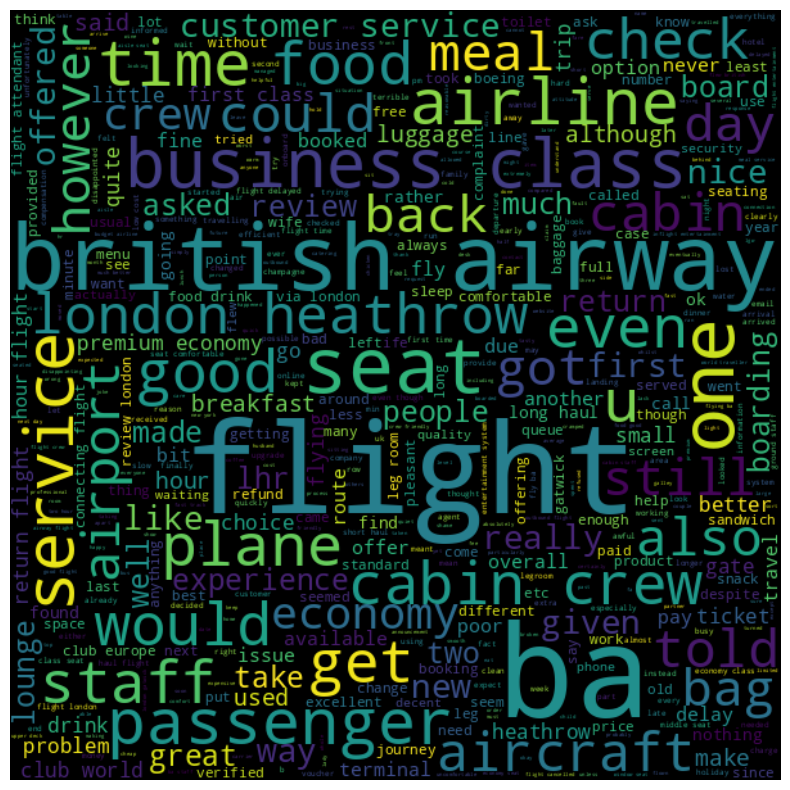

In [107]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords resource
nltk.download('stopwords')

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Now you can safely use stopwords.words('english')
stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("image/wordcloud.png", dpi=300)
plt.show()

**Not set the idea of whether the review is positive or negative**.


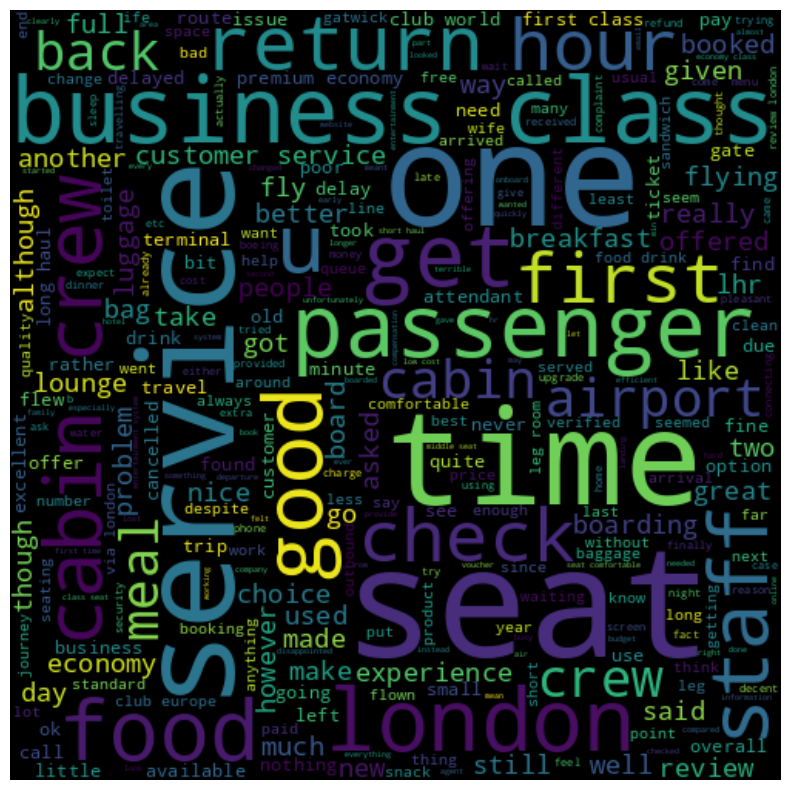

In [108]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [109]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# split the text of all reviews into a list of words
words = reviews.split(" ")

# remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

# create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

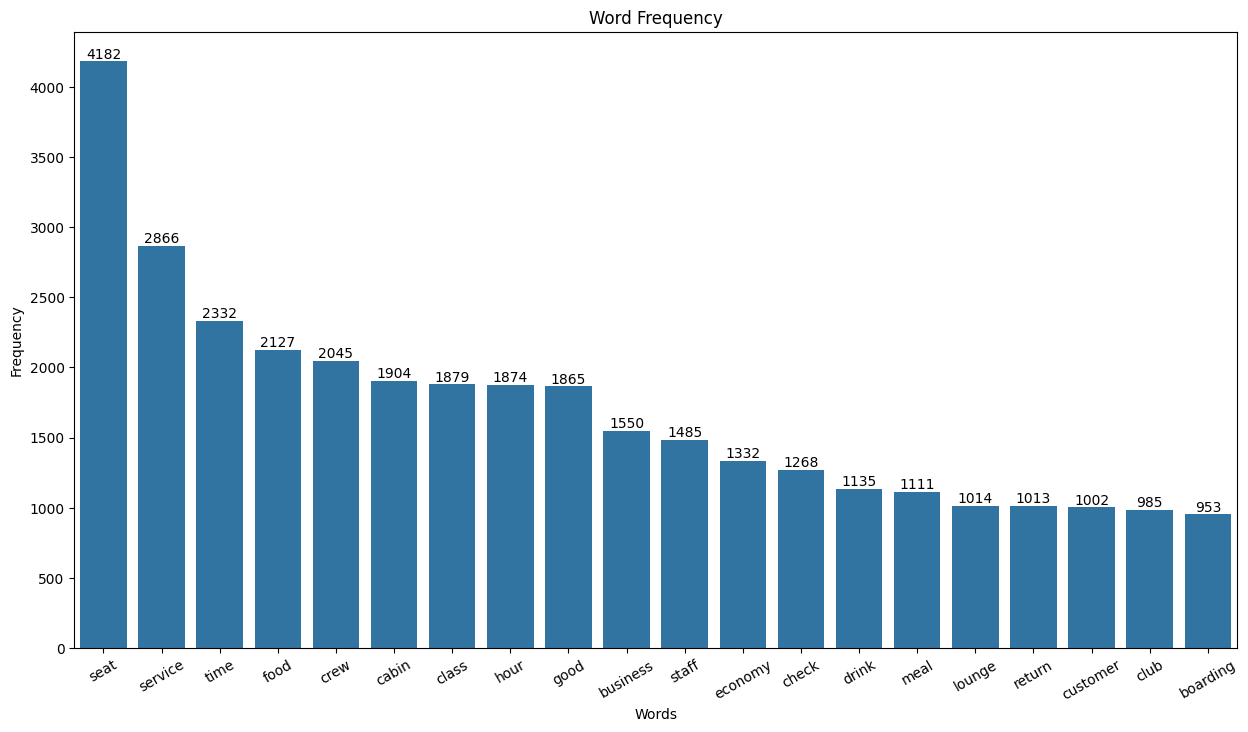

In [111]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.savefig("image/word_frequency.png", dpi=300)
plt.show()

**Seat is most talked about the airline followed by Service and food:**we still do not know is how they are expressing about each of this service. Use **ngram plots** to see if they are **bad or good** in experience.

## Word Frequency with N-gram

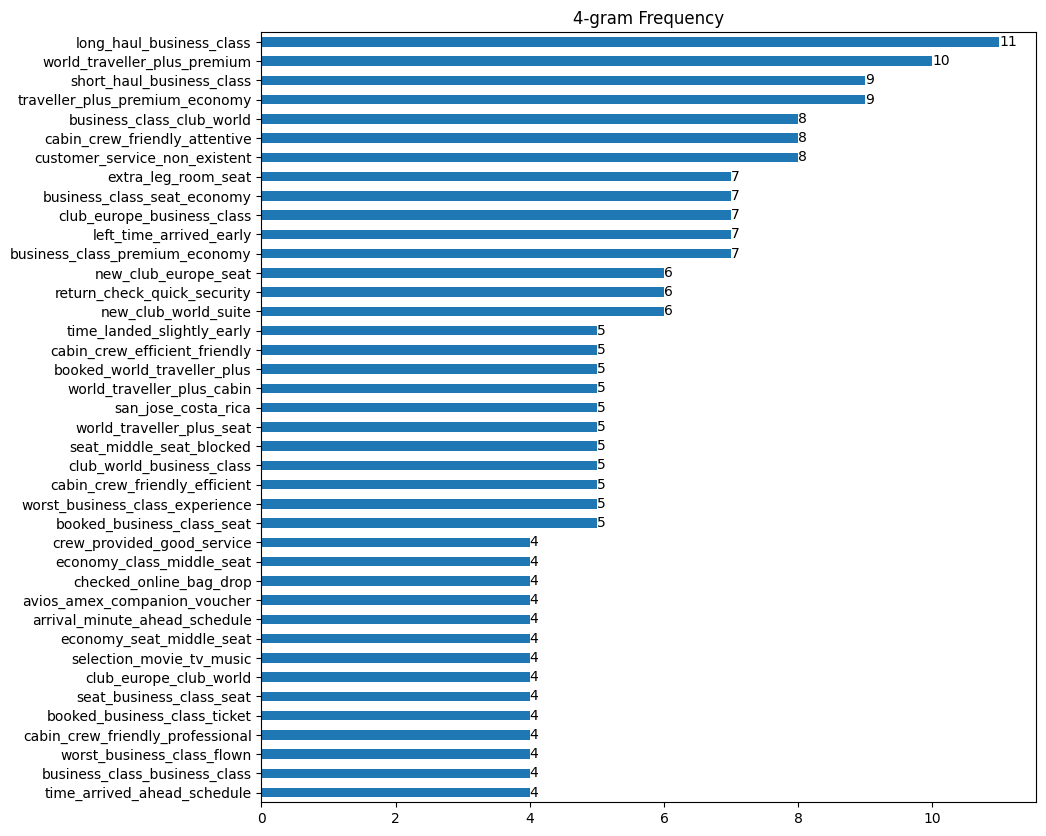

<Axes: title={'center': '4-gram Frequency'}>

In [113]:
# import modules
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

# split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams ):
    from nltk import ngrams

    # Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    ax.bar_label(ax.containers[0])
    plt.title(f"{number_of_ngrams}-gram Frequency")
    plt.show()

    return ax

get_freq_dist(new_words,4)

##### Findings:
  - Positive terms regarding cabin crew     
     - cabin_crew_friendly_helpful
     - cabin_crew_friendly_attentive
     - cabin_crew_friendly_efficient
  - Cutomers are providing good reviews about cabin crew staff

We will group the reviews based on ratings for better idea.
- Assume
  - ratigs 1-3 are bad reviews
  - 4-6 are average/good experience
  - 7-10 indicates a great experience

In [114]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

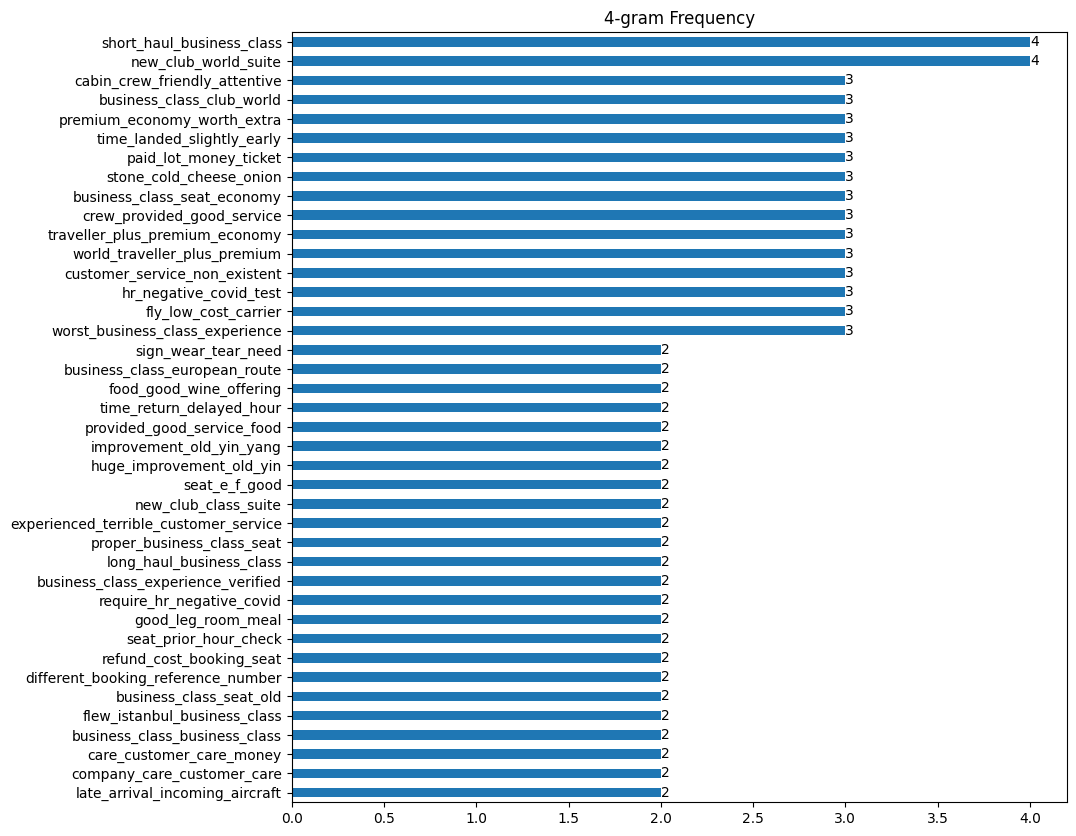

<Axes: title={'center': '4-gram Frequency'}>

In [115]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

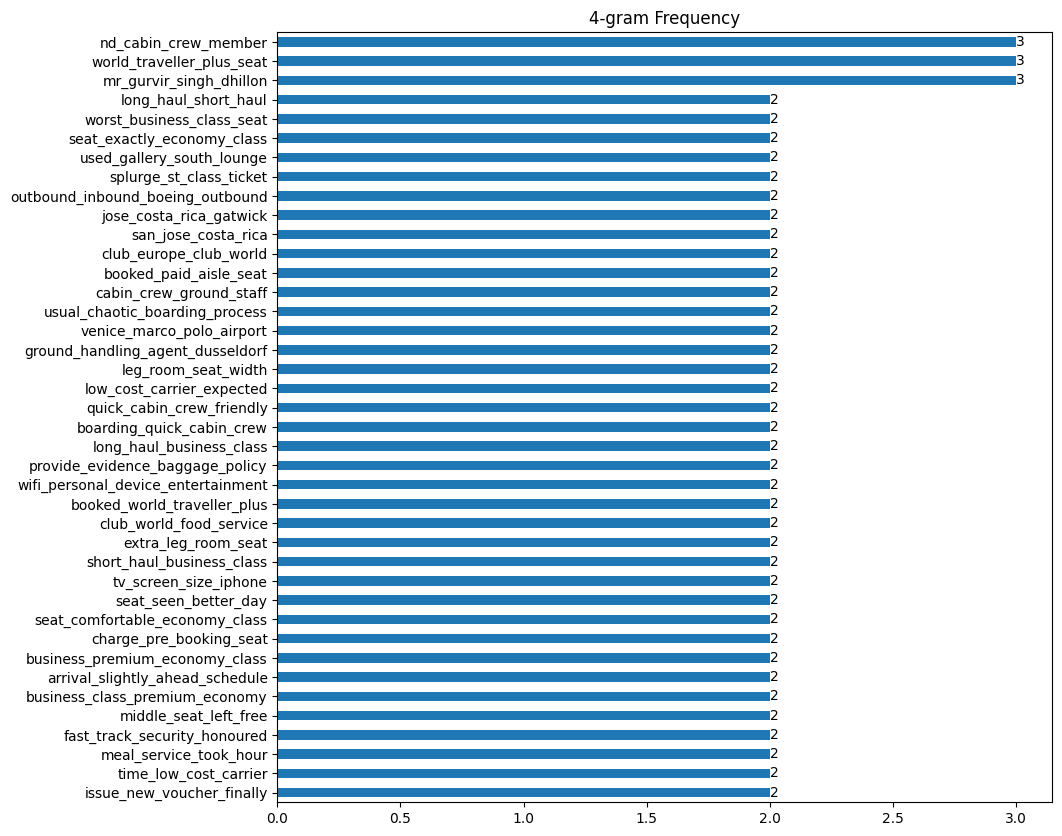

<Axes: title={'center': '4-gram Frequency'}>

In [116]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

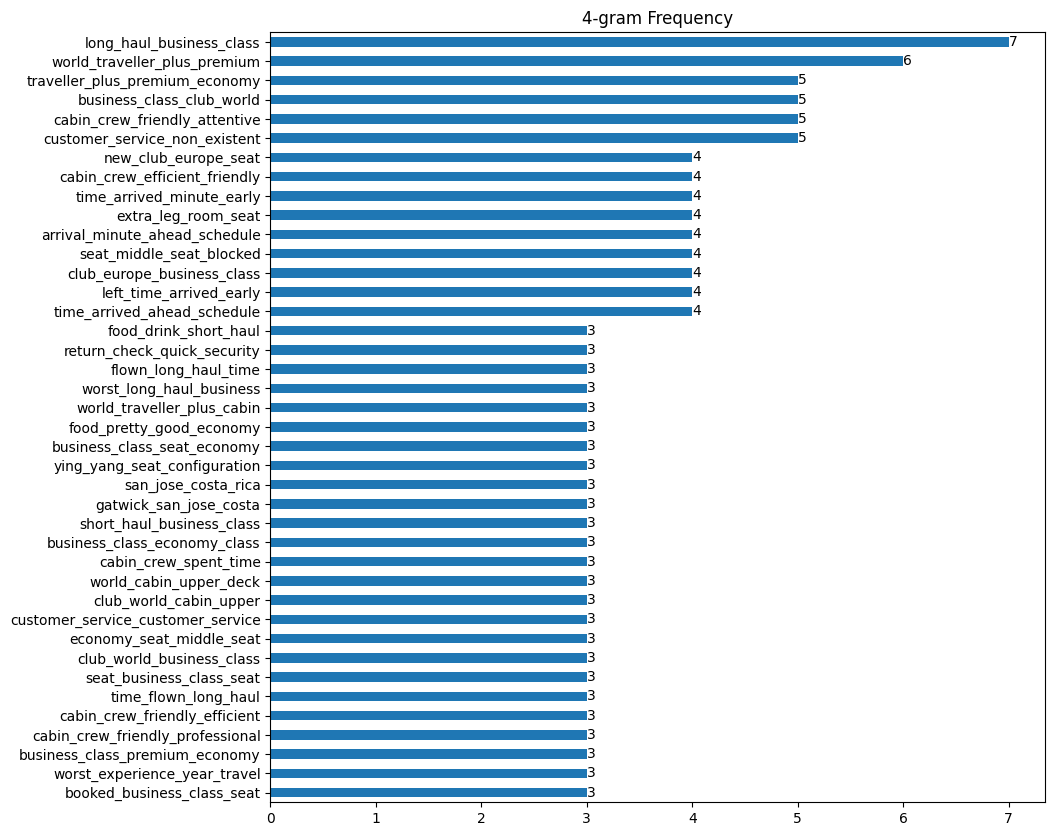

<Axes: title={'center': '4-gram Frequency'}>

In [117]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

****

**Note:** textblob library to define if the text is negative or positive and to what extent.

In [120]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

# Iterate using df.iterrows() to avoid index issues
for index, row in df.iterrows():
    sent = TextBlob(row['corpus'])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df.loc[index, 'polarity'] = polarity # Use .loc for safe assignment

In [121]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2422 number of reviews between -0.2 and 0.2 polarity score
1427 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between **-1 to 1** and more close the value to -1, it **indicates negative review** and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of **labelling the reveiws as positives or negatives.** In this we will use **VADER algorihtm** by nltk library.

In [127]:
%%capture
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()


#set a column Polarity with all 0 values initially
df['label'] = 0

# Iterate through the dataframe using .iterrows() to access rows and index
for index, row in df.iterrows():

    # Access 'corpus' column from the row using .loc or ['corpus']
    score = vds.polarity_scores(row['corpus'])['compound']

    if score > 0.2:
        df.loc[index, 'label'] = 1
    elif score < 0:
        df.loc[index, 'label'] = -1
    else:
        df.loc[index, 'label'] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [128]:
df.label.value_counts()

,count
label,
1,2173
-1,1203
0,123


## Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use **count vectorizer method** from sklearn library.

In [130]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

# create an object of count vectorizer
vect = CountVectorizer()

# apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [131]:
# import LDA module
from sklearn.decomposition import LatentDirichletAllocation

# declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# fit the term frequency data to the model
model.fit(tf)

# create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

# loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [132]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,2559.2,flight,689.3,flight,2049.8,seat,614.4,bag,74.4,flight,427.5,seat,2145.4,ba,433.0
1,ba,1440.9,ba,311.7,seat,913.9,flight,604.8,airway,67.4,class,240.2,ba,1313.1,service,408.4
2,hour,857.8,time,271.6,good,838.2,ba,440.1,british,63.8,airway,233.8,class,1176.8,airline,396.3
3,customer,695.4,food,251.8,crew,821.6,passenger,302.9,city,52.1,british,222.3,flight,1061.5,british,343.1
4,service,636.8,crew,243.4,time,766.4,staff,295.5,london,45.8,business,204.7,business,969.6,airway,321.9
5,day,610.9,cabin,187.7,service,710.6,time,241.8,carry,30.8,ba,189.2,food,838.5,food,316.7
6,london,588.3,london,176.3,ba,667.8,told,241.7,plane,30.4,airline,168.6,service,703.4,class,280.1
7,british,558.0,good,174.9,cabin,647.8,hour,235.7,check,28.7,luggage,154.0,economy,690.4,flight,264.7
8,time,557.8,seat,170.1,drink,605.1,crew,233.6,mexico,22.0,london,153.1,good,688.9,business,220.4
9,airway,548.4,return,153.6,food,561.6,one,229.6,flight,20.1,staff,129.8,cabin,665.1,review,206.9


There are certain words that are not useful to detect the tone of the reviews; for example **britsh airways, passenger, flight.**

## Topic modeling with NMF

In [133]:
# import module
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.06828383, 0.00318969],
       [0.0455072 , 0.03537521],
       [0.0485093 , 0.11364094],
       ...,
       [0.05103651, 0.02741659],
       [0.19032557, 0.02684082],
       [0.093572  , 0.0207096 ]])

In [134]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [135]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,22.9,flight,21.7
1,ba,13.1,ba,7.4
2,class,10.6,hour,5.1
3,business,8.4,time,4.0
4,service,8.4,london,3.7
5,food,8.2,british,3.6
6,cabin,8.0,airway,3.6
7,crew,7.5,service,3.3
8,good,7.2,would,3.2
9,economy,6.3,day,2.8


With NMF algorithm as well we see there are few words that are not conclusive; **seat**.